# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     825.0
Date:                Fri, 23 May 2025   Prob (F-statistic):           5.54e-40
Time:                        12:17:40   Log-Likelihood:                -3.1361
No. Observations:                  50   AIC:                             14.27
Df Residuals:                      46   BIC:                             21.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8136      0.092     52.578      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.28095705  4.77327935  5.22613118  5.61245928  5.91497379  6.12898888
  6.26319266  6.3382197   6.3832609   6.43126742  6.51353697  6.65457164
  6.86805231  7.15459089  7.5016298   7.88550515  8.27533463  8.63809141
  8.94403033  9.17157499  9.31086262  9.36536458  9.35131597  9.29504828
  9.22866318  9.18475834  9.19107168  9.26592415  9.4152096   9.63142651
  9.8949104  10.17706467 10.44505896 10.66722306 10.81825026 10.88335514
 10.8607028  10.76171032 10.60917095 10.43350928 10.26778253 10.14224936
 10.07939846 10.09025369 10.17256296 10.31116816 10.48049566 10.64875795
 10.78317624 10.85536594]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.83166295 10.67615735 10.40831601 10.0725014   9.72711016  9.43027555
  9.2256344   9.13164329  9.13705973  9.20369473]


## Plot comparison

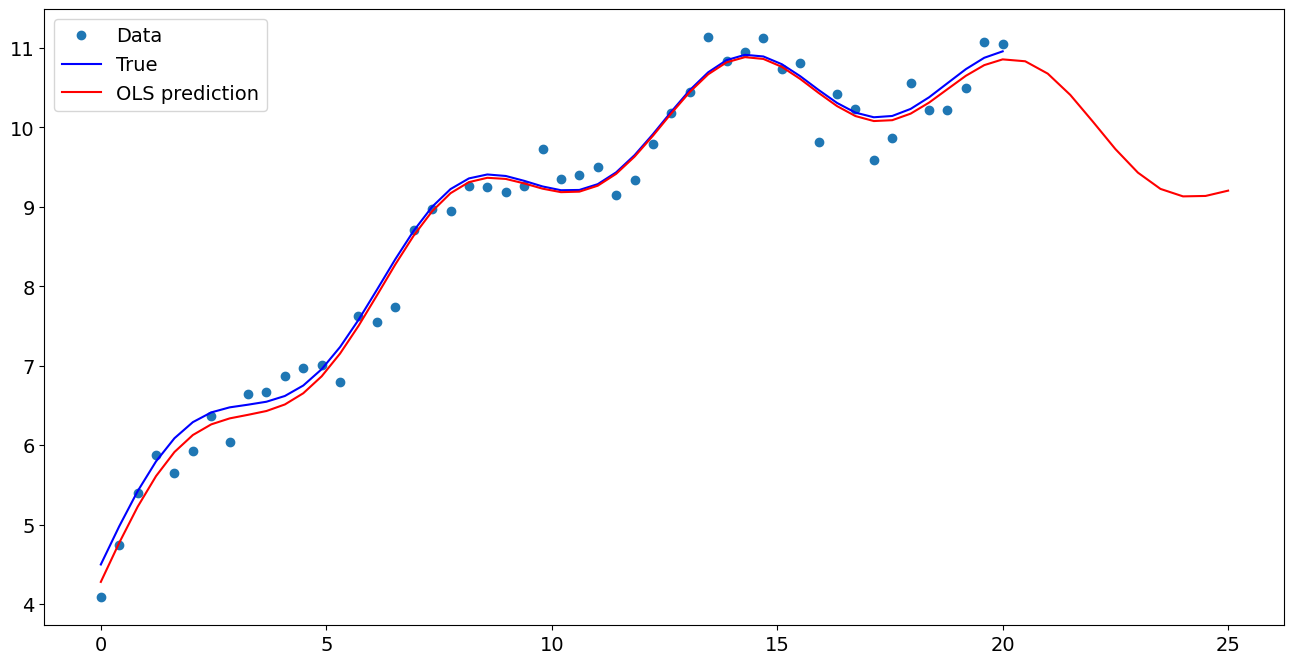

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.813576
x1                  0.519109
np.sin(x1)          0.496398
I((x1 - 5) ** 2)   -0.021305
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.831663
1    10.676157
2    10.408316
3    10.072501
4     9.727110
5     9.430276
6     9.225634
7     9.131643
8     9.137060
9     9.203695
dtype: float64